<a href="https://colab.research.google.com/github/yunha91/analysis/blob/master/%ED%98%BC%EB%B0%A5%EC%A1%B1%EC%A7%80%EC%97%AD%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


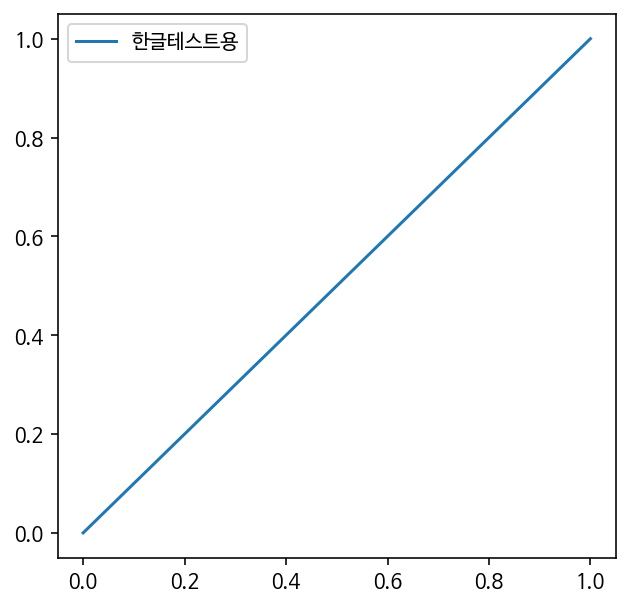

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import missingno
from plotnine import * #ggplot과 유사 패키지
import folium # 지도시각화
import warnings
import re

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df='/content/gdrive/My Drive/Data'

In [ ]:
df_2014=pd.read_csv('/content/gdrive/My Drive/Data/2014_세대원수별 세대수.csv', encoding='cp949',thousands=',')

In [ ]:
df_2015=pd.read_csv('/content/gdrive/My Drive/Data/2015_세대원수별 세대수.csv', encoding='cp949', thousands=',')
df_2016=pd.read_csv('/content/gdrive/My Drive/Data/2016_세대원수별 세대수.csv', encoding='cp949')
df_2017=pd.read_csv('/content/gdrive/My Drive/Data/2017_세대원수별 세대수.csv', encoding='cp949')
df_2018=pd.read_csv('/content/gdrive/My Drive/Data/2018_세대원수별 세대수.csv', encoding='cp949')

In [ ]:
df_2014.shape

(3862, 133)

In [ ]:
df_2014.head()

,행정구역,2014년01월_전체세대,2014년01월_1인세대,2014년01월_2인세대,2014년01월_3인세대,2014년01월_4인세대,2014년01월_5인세대,2014년01월_6인세대,2014년01월_7인세대,2014년01월_8인세대,2014년01월_9인세대,2014년01월_10인세대,2014년02월_전체세대,2014년02월_1인세대,2014년02월_2인세대,2014년02월_3인세대,2014년02월_4인세대,2014년02월_5인세대,2014년02월_6인세대,2014년02월_7인세대,2014년02월_8인세대,2014년02월_9인세대,2014년02월_10인세대,2014년03월_전체세대,2014년03월_1인세대,2014년03월_2인세대,2014년03월_3인세대,2014년03월_4인세대,2014년03월_5인세대,2014년03월_6인세대,2014년03월_7인세대,2014년03월_8인세대,2014년03월_9인세대,2014년03월_10인세대,2014년04월_전체세대,2014년04월_1인세대,2014년04월_2인세대,2014년04월_3인세대,2014년04월_4인세대,2014년04월_5인세대,...,2014년09월_4인세대,2014년09월_5인세대,2014년09월_6인세대,2014년09월_7인세대,2014년09월_8인세대,2014년09월_9인세대,2014년09월_10인세대,2014년10월_전체세대,2014년10월_1인세대,2014년10월_2인세대,2014년10월_3인세대,2014년10월_4인세대,2014년10월_5인세대,2014년10월_6인세대,2014년10월_7인세대,2014년10월_8인세대,2014년10월_9인세대,2014년10월_10인세대,2014년11월_전체세대,2014년11월_1인세대,2014년11월_2인세대,2014년11월_3인세대,2014년11월_4인세대,2014년11월_5인세대,2014년11월_6인세대,2014년11월_7인세대,2014년11월_8인세대,2014년11월_9인세대,2014년11월_10인세대,2014년12월_전체세대,2014년12월_1인세대,2014년12월_2인세대,2014년12월_3인세대,2014년12월_4인세대,2014년12월_5인세대,2014년12월_6인세대,2014년12월_7인세대,2014년12월_8인세대,2014년12월_9인세대,2014년12월_10인세대
0,전국 (1),20466884.0,6878013.0,4168201.0,3797996.0,4118031.0,1149025.0,266143.0,64113.0,16414.0,4959.0,3989.0,20500837.0,6905375.0,4180509.0,3804094.0,4111503.0,1145294.0,264857.0,63916.0,16433.0,4908.0,3948.0,20527351.0,6927061.0,4187859.0,3807048.0,4111346.0,1142443.0,263145.0,63345.0,16241.0,4910.0,3953.0,20549492.0,6942847.0,4197405.0,3809928.0,4107870.0,1140902.0,...,4089764.0,1130143.0,258714.0,62449.0,16181.0,4780.0,3935.0,20682278.0,7024621.0,4268916.0,3832694.0,4082311.0,1127969.0,258578.0,62252.0,16180.0,4781.0,3976.0,20702623.0,7037442.0,4280615.0,3835002.0,4077147.0,1126714.0,258456.0,62284.0,16223.0,4787.0,3953.0,20724911.0,7049504.0,4297546.0,3839603.0,4067398.0,1124512.0,258645.0,62513.0,16286.0,4845.0,4059.0
1,서울특별시 (1100000000),4182556.0,1509520.0,811779.0,781253.0,822068.0,200084.0,43935.0,9960.0,2599.0,806.0,552.0,4188621.0,1516026.0,812868.0,781694.0,820991.0,199360.0,43782.0,9986.0,2571.0,788.0,555.0,4190331.0,1518916.0,812578.0,781759.0,820758.0,198949.0,43551.0,9921.0,2545.0,791.0,563.0,4189778.0,1518936.0,813507.0,781767.0,819530.0,198692.0,...,812667.0,196347.0,42985.0,10032.0,2621.0,831.0,554.0,4195960.0,1525687.0,822985.0,783525.0,810932.0,195693.0,43052.0,10054.0,2632.0,830.0,570.0,4195300.0,1525950.0,824208.0,783240.0,809468.0,195153.0,43119.0,10106.0,2639.0,841.0,576.0,4194176.0,1526038.0,825915.0,783470.0,806997.0,194491.0,42975.0,10198.0,2656.0,846.0,590.0
2,서울특별시 종로구 (1111000000),73548.0,34171.0,13213.0,11125.0,10899.0,3125.0,751.0,194.0,40.0,17.0,13.0,73683.0,34371.0,13177.0,11116.0,10911.0,3092.0,754.0,194.0,41.0,14.0,13.0,73689.0,34444.0,13192.0,11104.0,10843.0,3084.0,758.0,192.0,44.0,14.0,14.0,73740.0,34610.0,13160.0,11086.0,10799.0,3065.0,...,10632.0,2984.0,743.0,181.0,45.0,16.0,10.0,73445.0,34649.0,13215.0,11007.0,10581.0,2999.0,745.0,175.0,47.0,17.0,10.0,73281.0,34545.0,13214.0,11007.0,10527.0,2992.0,741.0,177.0,51.0,17.0,10.0,73101.0,34445.0,13223.0,10992.0,10472.0,2980.0,732.0,181.0,46.0,21.0,9.0
3,서울특별시 종로구 청운효자동(1111051500),5877.0,2076.0,1114.0,1083.0,1158.0,334.0,85.0,23.0,1.0,3.0,0.0,5887.0,2084.0,1113.0,1079.0,1168.0,325.0,90.0,25.0,1.0,2.0,0.0,5903.0,2083.0,1116.0,1088.0,1174.0,323.0,91.0,24.0,2.0,2.0,0.0,5876.0,2084.0,1114.0,1078.0,1169.0,315.0,...,1141.0,316.0,88.0,20.0,1.0,2.0,0.0,5823.0,2072.0,1126.0,1076.0,1130.0,308.0,87.0,20.0,1.0,3.0,0.0,5837.0,2079.0,1125.0,1077.0,1135.0,308.0,87.0,21.0,2.0,3.0,0.0,5830.0,2084.0,1118.0,1093.0,1111.0,313.0,85.0,21.0,2.0,3.0,0.0
4,서울특별시 종로구 사직동(1111053000),4477.0,1951.0,884.0,759.0,625.0,189.0,50.0,10.0,3.0,3.0,3.0,4477.0,1953.0,889.0,748.0,636.0,182.0,49.0,11.0,3.0,3.0,3.0,4463.0,1951.0,884.0,743.0,632.0,182.0,51.0,10.0,4.0,3.0,3.0,4454.0,1941.0,887.0,734.0,643.0,176.0,...,640.0,173.0,51.0,9.0,4.0,2.0,4.0,4439.0,1939.0,887.0,740.0,635.0,169.0,50.0,9.0,4.0,2.0,4.0,4429.0,1927.0,896.0,742.0,628.0,167.0,49.0,9.0,5.0,2.0,4.0,4400.0,1892.0,891

In [ ]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Columns: 133 entries, 행정구역 to 2014년12월_10인세대
dtypes: float64(132), object(1)
memory usage: 3.9+ MB


In [ ]:
df_2014.columns

Index(['행정구역', '2014년01월_전체세대', '2014년01월_1인세대', '2014년01월_2인세대',
       '2014년01월_3인세대', '2014년01월_4인세대', '2014년01월_5인세대', '2014년01월_6인세대',
       '2014년01월_7인세대', '2014년01월_8인세대',
       ...
       '2014년12월_1인세대', '2014년12월_2인세대', '2014년12월_3인세대', '2014년12월_4인세대',
       '2014년12월_5인세대', '2014년12월_6인세대', '2014년12월_7인세대', '2014년12월_8인세대',
       '2014년12월_9인세대', '2014년12월_10인세대'],
      dtype='object', length=133)

In [ ]:
seoul = df_2014[df_2014['행정구역'].str.contains('서울특별시')]
seoul.reset_index(drop=True)
seoul.head()

,행정구역,2014년01월_전체세대,2014년01월_1인세대,2014년01월_2인세대,2014년01월_3인세대,2014년01월_4인세대,2014년01월_5인세대,2014년01월_6인세대,2014년01월_7인세대,2014년01월_8인세대,2014년01월_9인세대,2014년01월_10인세대,2014년02월_전체세대,2014년02월_1인세대,2014년02월_2인세대,2014년02월_3인세대,2014년02월_4인세대,2014년02월_5인세대,2014년02월_6인세대,2014년02월_7인세대,2014년02월_8인세대,2014년02월_9인세대,2014년02월_10인세대,2014년03월_전체세대,2014년03월_1인세대,2014년03월_2인세대,2014년03월_3인세대,2014년03월_4인세대,2014년03월_5인세대,2014년03월_6인세대,2014년03월_7인세대,2014년03월_8인세대,2014년03월_9인세대,2014년03월_10인세대,2014년04월_전체세대,2014년04월_1인세대,2014년04월_2인세대,2014년04월_3인세대,2014년04월_4인세대,2014년04월_5인세대,...,2014년09월_4인세대,2014년09월_5인세대,2014년09월_6인세대,2014년09월_7인세대,2014년09월_8인세대,2014년09월_9인세대,2014년09월_10인세대,2014년10월_전체세대,2014년10월_1인세대,2014년10월_2인세대,2014년10월_3인세대,2014년10월_4인세대,2014년10월_5인세대,2014년10월_6인세대,2014년10월_7인세대,2014년10월_8인세대,2014년10월_9인세대,2014년10월_10인세대,2014년11월_전체세대,2014년11월_1인세대,2014년11월_2인세대,2014년11월_3인세대,2014년11월_4인세대,2014년11월_5인세대,2014년11월_6인세대,2014년11월_7인세대,2014년11월_8인세대,2014년11월_9인세대,2014년11월_10인세대,2014년12월_전체세대,2014년12월_1인세대,2014년12월_2인세대,2014년12월_3인세대,2014년12월_4인세대,2014년12월_5인세대,2014년12월_6인세대,2014년12월_7인세대,2014년12월_8인세대,2014년12월_9인세대,2014년12월_10인세대
1,서울특별시 (1100000000),4182556.0,1509520.0,811779.0,781253.0,822068.0,200084.0,43935.0,9960.0,2599.0,806.0,552.0,4188621.0,1516026.0,812868.0,781694.0,820991.0,199360.0,43782.0,9986.0,2571.0,788.0,555.0,4190331.0,1518916.0,812578.0,781759.0,820758.0,198949.0,43551.0,9921.0,2545.0,791.0,563.0,4189778.0,1518936.0,813507.0,781767.0,819530.0,198692.0,...,812667.0,196347.0,42985.0,10032.0,2621.0,831.0,554.0,4195960.0,1525687.0,822985.0,783525.0,810932.0,195693.0,43052.0,10054.0,2632.0,830.0,570.0,4195300.0,1525950.0,824208.0,783240.0,809468.0,195153.0,43119.0,10106.0,2639.0,841.0,576.0,4194176.0,1526038.0,825915.0,783470.0,806997.0,194491.0,42975.0,10198.0,2656.0,846.0,590.0
2,서울특별시 종로구 (1111000000),73548.0,34171.0,13213.0,11125.0,10899.0,3125.0,751.0,194.0,40.0,17.0,13.0,73683.0,34371.0,13177.0,11116.0,10911.0,3092.0,754.0,194.0,41.0,14.0,13.0,73689.0,34444.0,13192.0,11104.0,10843.0,3084.0,758.0,192.0,44.0,14.0,14.0,73740.0,34610.0,13160.0,11086.0,10799.0,3065.0,...,10632.0,2984.0,743.0,181.0,45.0,16.0,10.0,73445.0,34649.0,13215.0,11007.0,10581.0,2999.0,745.0,175.0,47.0,17.0,10.0,73281.0,34545.0,13214.0,11007.0,10527.0,2992.0,741.0,177.0,51.0,17.0,10.0,73101.0,34445.0,13223.0,10992.0,10472.0,2980.0,732.0,181.0,46.0,21.0,9.0
3,서울특별시 종로구 청운효자동(1111051500),5877.0,2076.0,1114.0,1083.0,1158.0,334.0,85.0,23.0,1.0,3.0,0.0,5887.0,2084.0,1113.0,1079.0,1168.0,325.0,90.0,25.0,1.0,2.0,0.0,5903.0,2083.0,1116.0,1088.0,1174.0,323.0,91.0,24.0,2.0,2.0,0.0,5876.0,2084.0,1114.0,1078.0,1169.0,315.0,...,1141.0,316.0,88.0,20.0,1.0,2.0,0.0,5823.0,2072.0,1126.0,1076.0,1130.0,308.0,87.0,20.0,1.0,3.0,0.0,5837.0,2079.0,1125.0,1077.0,1135.0,308.0,87.0,21.0,2.0,3.0,0.0,5830.0,2084.0,1118.0,1093.0,1111.0,313.0,85.0,21.0,2.0,3.0,0.0
4,서울특별시 종로구 사직동(1111053000),4477.0,1951.0,884.0,759.0,625.0,189.0,50.0,10.0,3.0,3.0,3.0,4477.0,1953.0,889.0,748.0,636.0,182.0,49.0,11.0,3.0,3.0,3.0,4463.0,1951.0,884.0,743.0,632.0,182.0,51.0,10.0,4.0,3.0,3.0,4454.0,1941.0,887.0,734.0,643.0,176.0,...,640.0,173.0,51.0,9.0,4.0,2.0,4.0,4439.0,1939.0,887.0,740.0,635.0,169.0,50.0,9.0,4.0,2.0,4.0,4429.0,1927.0,896.0,742.0,628.0,167.0,49.0,9.0,5.0,2.0,4.0,4400.0,1892.0,891.0,741.0,636.0,168.0,51.0,10.0,5.0,2.0,4.0
5,서울특별시 종로구 삼청동(1111054000),1531.0,761.0,277.0,206.0,190.0,75.0,14.0,7.0,0.0,1.0,0.0,1522.0,758.0,277.0,202.0,184.0,79.0,13.0,9.0,0.0,0.0,0.0,1516.0,752.0,281.0,198.0,184.0,78.0,13.0,10.0,0.0,0.0,0.0,1506.0,746.0,278.0,195.0,191.0,73.0,...,188.0,67.0,12.0,10.0,0.0,0.0,0.0,1458.0,716.0,272.0,194.0,185.0,70.0,12.0,9.0,0.0,0.0,0.0,1462.0,722.0,272.0,197.0,180.0,69.0,13.0,9.0,0.0,0.0,0.0,1461.0,722.0,273.0,194.0,183.0,67.0,13.0,9.0,0.0,0.0,0.0


In [ ]:
seoul['행정구역']=seoul['행정구역'].apply(lambda x: re.sub('[^가-힣]|[서울특별시]','',x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
seoul.head()

,행정구역,2014년01월_전체세대,2014년01월_1인세대,2014년01월_2인세대,2014년01월_3인세대,2014년01월_4인세대,2014년01월_5인세대,2014년01월_6인세대,2014년01월_7인세대,2014년01월_8인세대,2014년01월_9인세대,2014년01월_10인세대,2014년02월_전체세대,2014년02월_1인세대,2014년02월_2인세대,2014년02월_3인세대,2014년02월_4인세대,2014년02월_5인세대,2014년02월_6인세대,2014년02월_7인세대,2014년02월_8인세대,2014년02월_9인세대,2014년02월_10인세대,2014년03월_전체세대,2014년03월_1인세대,2014년03월_2인세대,2014년03월_3인세대,2014년03월_4인세대,2014년03월_5인세대,2014년03월_6인세대,2014년03월_7인세대,2014년03월_8인세대,2014년03월_9인세대,2014년03월_10인세대,2014년04월_전체세대,2014년04월_1인세대,2014년04월_2인세대,2014년04월_3인세대,2014년04월_4인세대,2014년04월_5인세대,...,2014년09월_4인세대,2014년09월_5인세대,2014년09월_6인세대,2014년09월_7인세대,2014년09월_8인세대,2014년09월_9인세대,2014년09월_10인세대,2014년10월_전체세대,2014년10월_1인세대,2014년10월_2인세대,2014년10월_3인세대,2014년10월_4인세대,2014년10월_5인세대,2014년10월_6인세대,2014년10월_7인세대,2014년10월_8인세대,2014년10월_9인세대,2014년10월_10인세대,2014년11월_전체세대,2014년11월_1인세대,2014년11월_2인세대,2014년11월_3인세대,2014년11월_4인세대,2014년11월_5인세대,2014년11월_6인세대,2014년11월_7인세대,2014년11월_8인세대,2014년11월_9인세대,2014년11월_10인세대,2014년12월_전체세대,2014년12월_1인세대,2014년12월_2인세대,2014년12월_3인세대,2014년12월_4인세대,2014년12월_5인세대,2014년12월_6인세대,2014년12월_7인세대,2014년12월_8인세대,2014년12월_9인세대,2014년12월_10인세대
1,,4182556.0,1509520.0,811779.0,781253.0,822068.0,200084.0,43935.0,9960.0,2599.0,806.0,552.0,4188621.0,1516026.0,812868.0,781694.0,820991.0,199360.0,43782.0,9986.0,2571.0,788.0,555.0,4190331.0,1518916.0,812578.0,781759.0,820758.0,198949.0,43551.0,9921.0,2545.0,791.0,563.0,4189778.0,1518936.0,813507.0,781767.0,819530.0,198692.0,...,812667.0,196347.0,42985.0,10032.0,2621.0,831.0,554.0,4195960.0,1525687.0,822985.0,783525.0,810932.0,195693.0,43052.0,10054.0,2632.0,830.0,570.0,4195300.0,1525950.0,824208.0,783240.0,809468.0,195153.0,43119.0,10106.0,2639.0,841.0,576.0,4194176.0,1526038.0,825915.0,783470.0,806997.0,194491.0,42975.0,10198.0,2656.0,846.0,590.0
2,종로구,73548.0,34171.0,13213.0,11125.0,10899.0,3125.0,751.0,194.0,40.0,17.0,13.0,73683.0,34371.0,13177.0,11116.0,10911.0,3092.0,754.0,194.0,41.0,14.0,13.0,73689.0,34444.0,13192.0,11104.0,10843.0,3084.0,758.0,192.0,44.0,14.0,14.0,73740.0,34610.0,13160.0,11086.0,10799.0,3065.0,...,10632.0,2984.0,743.0,181.0,45.0,16.0,10.0,73445.0,34649.0,13215.0,11007.0,10581.0,2999.0,745.0,175.0,47.0,17.0,10.0,73281.0,34545.0,13214.0,11007.0,10527.0,2992.0,741.0,177.0,51.0,17.0,10.0,73101.0,34445.0,13223.0,10992.0,10472.0,2980.0,732.0,181.0,46.0,21.0,9.0
3,종로구청운효자동,5877.0,2076.0,1114.0,1083.0,1158.0,334.0,85.0,23.0,1.0,3.0,0.0,5887.0,2084.0,1113.0,1079.0,1168.0,325.0,90.0,25.0,1.0,2.0,0.0,5903.0,2083.0,1116.0,1088.0,1174.0,323.0,91.0,24.0,2.0,2.0,0.0,5876.0,2084.0,1114.0,1078.0,1169.0,315.0,...,1141.0,316.0,88.0,20.0,1.0,2.0,0.0,5823.0,2072.0,1126.0,1076.0,1130.0,308.0,87.0,20.0,1.0,3.0,0.0,5837.0,2079.0,1125.0,1077.0,1135.0,308.0,87.0,21.0,2.0,3.0,0.0,5830.0,2084.0,1118.0,1093.0,1111.0,313.0,85.0,21.0,2.0,3.0,0.0
4,종로구사직동,4477.0,1951.0,884.0,759.0,625.0,189.0,50.0,10.0,3.0,3.0,3.0,4477.0,1953.0,889.0,748.0,636.0,182.0,49.0,11.0,3.0,3.0,3.0,4463.0,1951.0,884.0,743.0,632.0,182.0,51.0,10.0,4.0,3.0,3.0,4454.0,1941.0,887.0,734.0,643.0,176.0,...,640.0,173.0,51.0,9.0,4.0,2.0,4.0,4439.0,1939.0,887.0,740.0,635.0,169.0,50.0,9.0,4.0,2.0,4.0,4429.0,1927.0,896.0,742.0,628.0,167.0,49.0,9.0,5.0,2.0,4.0,4400.0,1892.0,891.0,741.0,636.0,168.0,51.0,10.0,5.0,2.0,4.0
5,종로구삼청동,1531.0,761.0,277.0,206.0,190.0,75.0,14.0,7.0,0.0,1.0,0.0,1522.0,758.0,277.0,202.0,184.0,79.0,13.0,9.0,0.0,0.0,0.0,1516.0,752.0,281.0,198.0,184.0,78.0,13.0,10.0,0.0,0.0,0.0,1506.0,746.0,278.0,195.0,191.0,73.0,...,188.0,67.0,12.0,10.0,0.0,0.0,0.0,1458.0,716.0,272.0,194.0,185.0,70.0,12.0,9.0,0.0,0.0,0.0,1462.0,722.0,272.0,197.0,180.0,69.0,13.0,9.0,0.0,0.0,0.0,1461.0,722.0,273.0,194.0,183.0,67.0,13.0,9.0,0.0,0.0,0.0


In [ ]:
seoul.columns
seoul['행정구역']

1              
2           종로구
3      종로구청운효자동
4        종로구사직동
5        종로구삼청동
         ...   
445     강동구성내제동
446     강동구성내제동
447       강동구길동
448     강동구둔촌제동
449     강동구둔촌제동
Name: 행정구역, Length: 449, dtype: object

In [ ]:
date = []
for i in seoul.columns:
    a= i[0:8]
    date.append(a)

In [ ]:
group=[]
for i in seoul.columns:
    a=i[9:]
    group.append(a)

In [ ]:
seoul_group=seoul

In [ ]:
seoul_group.columns=group

In [ ]:
seoul_group.head()

,행정구역,전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대,전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대,전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대,전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,...,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대,전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대,전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대,전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대
1,,4182556.0,1509520.0,811779.0,781253.0,822068.0,200084.0,43935.0,9960.0,2599.0,806.0,552.0,4188621.0,1516026.0,812868.0,781694.0,820991.0,199360.0,43782.0,9986.0,2571.0,788.0,555.0,4190331.0,1518916.0,812578.0,781759.0,820758.0,198949.0,43551.0,9921.0,2545.0,791.0,563.0,4189778.0,1518936.0,813507.0,781767.0,819530.0,198692.0,...,812667.0,196347.0,42985.0,10032.0,2621.0,831.0,554.0,4195960.0,1525687.0,822985.0,783525.0,810932.0,195693.0,43052.0,10054.0,2632.0,830.0,570.0,4195300.0,1525950.0,824208.0,783240.0,809468.0,195153.0,43119.0,10106.0,2639.0,841.0,576.0,4194176.0,1526038.0,825915.0,783470.0,806997.0,194491.0,42975.0,10198.0,2656.0,846.0,590.0
2,종로구,73548.0,34171.0,13213.0,11125.0,10899.0,3125.0,751.0,194.0,40.0,17.0,13.0,73683.0,34371.0,13177.0,11116.0,10911.0,3092.0,754.0,194.0,41.0,14.0,13.0,73689.0,34444.0,13192.0,11104.0,10843.0,3084.0,758.0,192.0,44.0,14.0,14.0,73740.0,34610.0,13160.0,11086.0,10799.0,3065.0,...,10632.0,2984.0,743.0,181.0,45.0,16.0,10.0,73445.0,34649.0,13215.0,11007.0,10581.0,2999.0,745.0,175.0,47.0,17.0,10.0,73281.0,34545.0,13214.0,11007.0,10527.0,2992.0,741.0,177.0,51.0,17.0,10.0,73101.0,34445.0,13223.0,10992.0,10472.0,2980.0,732.0,181.0,46.0,21.0,9.0
3,종로구청운효자동,5877.0,2076.0,1114.0,1083.0,1158.0,334.0,85.0,23.0,1.0,3.0,0.0,5887.0,2084.0,1113.0,1079.0,1168.0,325.0,90.0,25.0,1.0,2.0,0.0,5903.0,2083.0,1116.0,1088.0,1174.0,323.0,91.0,24.0,2.0,2.0,0.0,5876.0,2084.0,1114.0,1078.0,1169.0,315.0,...,1141.0,316.0,88.0,20.0,1.0,2.0,0.0,5823.0,2072.0,1126.0,1076.0,1130.0,308.0,87.0,20.0,1.0,3.0,0.0,5837.0,2079.0,1125.0,1077.0,1135.0,308.0,87.0,21.0,2.0,3.0,0.0,5830.0,2084.0,1118.0,1093.0,1111.0,313.0,85.0,21.0,2.0,3.0,0.0
4,종로구사직동,4477.0,1951.0,884.0,759.0,625.0,189.0,50.0,10.0,3.0,3.0,3.0,4477.0,1953.0,889.0,748.0,636.0,182.0,49.0,11.0,3.0,3.0,3.0,4463.0,1951.0,884.0,743.0,632.0,182.0,51.0,10.0,4.0,3.0,3.0,4454.0,1941.0,887.0,734.0,643.0,176.0,...,640.0,173.0,51.0,9.0,4.0,2.0,4.0,4439.0,1939.0,887.0,740.0,635.0,169.0,50.0,9.0,4.0,2.0,4.0,4429.0,1927.0,896.0,742.0,628.0,167.0,49.0,9.0,5.0,2.0,4.0,4400.0,1892.0,891.0,741.0,636.0,168.0,51.0,10.0,5.0,2.0,4.0
5,종로구삼청동,1531.0,761.0,277.0,206.0,190.0,75.0,14.0,7.0,0.0,1.0,0.0,1522.0,758.0,277.0,202.0,184.0,79.0,13.0,9.0,0.0,0.0,0.0,1516.0,752.0,281.0,198.0,184.0,78.0,13.0,10.0,0.0,0.0,0.0,1506.0,746.0,278.0,195.0,191.0,73.0,...,188.0,67.0,12.0,10.0,0.0,0.0,0.0,1458.0,716.0,272.0,194.0,185.0,70.0,12.0,9.0,0.0,0.0,0.0,1462.0,722.0,272.0,197.0,180.0,69.0,13.0,9.0,0.0,0.0,0.0,1461.0,722.0,273.0,194.0,183.0,67.0,13.0,9.0,0.0,0.0,0.0


In [ ]:
column_list = seoul_group[:0].columns

In [ ]:
seoul_group[:0].columns.name='group'

In [ ]:
seoul_group=seoul_group.transpose()

In [ ]:
seoul_group_sum=seoul_group.groupby('group').sum()

In [ ]:
seoul_group_sum.columns=seoul['행정구역']

In [ ]:
population = seoul_group[['행정구역','전체세대']]

In [ ]:
index=[]
for i in range(len(seoul_group_sum.columns)):
    if len(seoul_group_sum.columns[i])<=3:
        index.append(seoul_group_sum.columns[i])
    

In [ ]:
seoul_region=seoul_group_sum[index]
seoul_region

행정구역,,종로구,중구,용산구,성동구,광진구,중랑구,성북구,강북구,도봉구,노원구,은평구,대문구,마포구,양천구,강구,구로구,금천구,동작구,관악구,초구,강남구,송파구,강동구
group,,,,,,,,,,,,,,,,,,,,,,,,
10인세대,6709,138,195,242,102,165,156,427,198,157,240,424,225,336,294,396,281,192,268,293,381,510,341,306
1인세대,1.82433e+07,414381,335188,582891,572256,774365,774600,849863,601968,476352,735224,811022,646135,823667,573455,886122,698950,500264,777392,1.46002e+06,644817,1.03436e+06,954996,692516
2인세대,9.81624e+06,158361,139795,253514,302273,359957,434239,458150,369215,344207,534144,509635,321986,399218,395098,570213,419670,244393,417358,550453,381158,502572,573636,425732
3인세대,9.39069e+06,132603,111749,212295,281546,330287,399196,442263,327298,353191,562214,481698,285664,342753,455827,560471,403576,219672,378081,437086,410673,503891,628980,456833
4인세대,9.78904e+06,128536,100931,192987,274161,344840,382604,447246,295748,362499,650231,467327,278338,337975,567319,568714,413626,214149,382388,405215,478898,590917,731034,505573
5인세대,2.36857e+06,36468,26656,50116,65506,78037,96686,111651,76250,87352,143200,121623,69845,82640,131060,136567,103780,53640,93164,100863,114110,135368,168155,121618
6인세대,519275,8980,6448,11610,15974,17204,20208,25895,16870,19532,27004,28123,16652,18498,25891,28139,23671,12223,20988,22491,25248,28336,33706,25954
7인세대,120018,2225,1687,2875,3840,3821,4392,6441,4498,4541,5806,6111,3661,4363,5597,6391,5409,2807,4877,5719,6712,6677,7058,5166
8인세대,31186,547,385,892,1090,1073,1048,1387,1137,1189,1661,1410,998,1326,1573,1459,1314,671,1387,1259,1803,1958,1853,1445


In [ ]:
seoul_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 10인세대 to 행정구역
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0           12 non-null     object
 1   종로구     12 non-null     object
 2   중구      12 non-null     object
 3   용산구     12 non-null     object
 4   성동구     12 non-null     object
 5   광진구     12 non-null     object
 6   중랑구     12 non-null     object
 7   성북구     12 non-null     object
 8   강북구     12 non-null     object
 9   도봉구     12 non-null     object
 10  노원구     12 non-null     object
 11  은평구     12 non-null     object
 12  대문구     12 non-null     object
 13  마포구     12 non-null     object
 14  양천구     12 non-null     object
 15  강구      12 non-null     object
 16  구로구     12 non-null     object
 17  금천구     12 non-null     object
 18  동작구     12 non-null     object
 19  관악구     12 non-null     object
 20  초구      12 non-null     object
 21  강남구     12 non-null     object
 22  송파구     12 non-null     obj

In [ ]:
seoul_region.isnull().sum()

행정구역
       0
종로구    0
중구     0
용산구    0
성동구    0
광진구    0
중랑구    0
성북구    0
강북구    0
도봉구    0
노원구    0
은평구    0
대문구    0
마포구    0
양천구    0
강구     0
구로구    0
금천구    0
동작구    0
관악구    0
초구     0
강남구    0
송파구    0
강동구    0
dtype: int64

In [ ]:
seoul_region.shape

(12, 24)

In [ ]:
seoul_region=seoul_region.iloc[1:10,1:24]

In [ ]:
seoul_region.info()
seoul_region=seoul_region.reset_index()
seoul_region

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1인세대 to 9인세대
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종로구     9 non-null      object
 1   중구      9 non-null      object
 2   용산구     9 non-null      object
 3   성동구     9 non-null      object
 4   광진구     9 non-null      object
 5   중랑구     9 non-null      object
 6   성북구     9 non-null      object
 7   강북구     9 non-null      object
 8   도봉구     9 non-null      object
 9   노원구     9 non-null      object
 10  은평구     9 non-null      object
 11  대문구     9 non-null      object
 12  마포구     9 non-null      object
 13  양천구     9 non-null      object
 14  강구      9 non-null      object
 15  구로구     9 non-null      object
 16  금천구     9 non-null      object
 17  동작구     9 non-null      object
 18  관악구     9 non-null      object
 19  초구      9 non-null      object
 20  강남구     9 non-null      object
 21  송파구     9 non-null      object
 22  강동구     9 non-null      objec

행정구역,group,종로구,중구,용산구,성동구,광진구,중랑구,성북구,강북구,도봉구,노원구,은평구,대문구,마포구,양천구,강구,구로구,금천구,동작구,관악구,초구,강남구,송파구,강동구
0,1인세대,414381,335188,582891,572256,774365,774600,849863,601968,476352,735224,811022,646135,823667,573455,886122,698950,500264,777392,1.46002e+06,644817,1.03436e+06,954996,692516
1,2인세대,158361,139795,253514,302273,359957,434239,458150,369215,344207,534144,509635,321986,399218,395098,570213,419670,244393,417358,550453,381158,502572,573636,425732
2,3인세대,132603,111749,212295,281546,330287,399196,442263,327298,353191,562214,481698,285664,342753,455827,560471,403576,219672,378081,437086,410673,503891,628980,456833
3,4인세대,128536,100931,192987,274161,344840,382604,447246,295748,362499,650231,467327,278338,337975,567319,568714,413626,214149,382388,405215,478898,590917,731034,505573
4,5인세대,36468,26656,50116,65506,78037,96686,111651,76250,87352,143200,121623,69845,82640,131060,136567,103780,53640,93164,100863,114110,135368,168155,121618
5,6인세대,8980,6448,11610,15974,17204,20208,25895,16870,19532,27004,28123,16652,18498,25891,28139,23671,12223,20988,22491,25248,28336,33706,25954
6,7인세대,2225,1687,2875,3840,3821,4392,6441,4498,4541,5806,6111,3661,4363,5597,6391,5409,2807,4877,5719,6712,6677,7058,5166
7,8인세대,547,385,892,1090,1073,1048,1387,1137,1189,1661,1410,998,1326,1573,1459,1314,671,1387,1259,1803,1958,1853,1445
8,9인세대,188,109,262,314,243,349,338,375,281,377,432,260,364,449,617,385,209,405,508,722,769,559,502


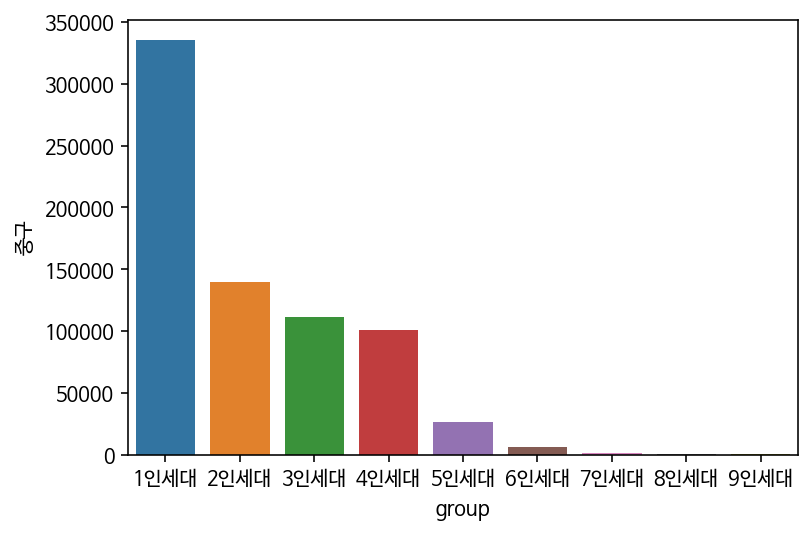

In [ ]:
sns.barplot(x='group',y='중구',data=seoul_region)

In [ ]:
sample = seoul_region.transpose()

In [ ]:
sample.columns=seoul_region['group']

In [ ]:
sample

group,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대
행정구역,,,,,,,,,
group,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대
종로구,414381,158361,132603,128536,36468,8980,2225,547,188
중구,335188,139795,111749,100931,26656,6448,1687,385,109
용산구,582891,253514,212295,192987,50116,11610,2875,892,262
성동구,572256,302273,281546,274161,65506,15974,3840,1090,314
광진구,774365,359957,330287,344840,78037,17204,3821,1073,243
중랑구,774600,434239,399196,382604,96686,20208,4392,1048,349
성북구,849863,458150,442263,447246,111651,25895,6441,1387,338
강북구,601968,369215,327298,295748,76250,16870,4498,1137,375


In [ ]:
sample = sample[1:]

In [ ]:
sample2=sample.sort_values(by='1인세대', ascending=False).reset_index(drop=True)

In [ ]:
sample

group,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대
행정구역,,,,,,,,,
종로구,414381,158361,132603,128536,36468,8980,2225,547,188
중구,335188,139795,111749,100931,26656,6448,1687,385,109
용산구,582891,253514,212295,192987,50116,11610,2875,892,262
성동구,572256,302273,281546,274161,65506,15974,3840,1090,314
광진구,774365,359957,330287,344840,78037,17204,3821,1073,243
중랑구,774600,434239,399196,382604,96686,20208,4392,1048,349
성북구,849863,458150,442263,447246,111651,25895,6441,1387,338
강북구,601968,369215,327298,295748,76250,16870,4498,1137,375
도봉구,476352,344207,353191,362499,87352,19532,4541,1189,281


In [ ]:
sample=sample.reset_index()

In [ ]:
sample2

group,행정구역,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대
0,관악구,1.46002e+06,550453,437086,405215,100863,22491,5719,1259,508
1,강남구,1.03436e+06,502572,503891,590917,135368,28336,6677,1958,769
2,송파구,954996,573636,628980,731034,168155,33706,7058,1853,559
3,강서구,886122,570213,560471,568714,136567,28139,6391,1459,617
4,성북구,849863,458150,442263,447246,111651,25895,6441,1387,338
5,마포구,823667,399218,342753,337975,82640,18498,4363,1326,364
6,은평구,811022,509635,481698,467327,121623,28123,6111,1410,432
7,동작구,777392,417358,378081,382388,93164,20988,4877,1387,405
8,중랑구,774600,434239,399196,382604,96686,20208,4392,1048,349
9,광진구,774365,359957,330287,344840,78037,17204,3821,1073,243


In [ ]:
sample['행정구역']
sample['행정구역'][14]='강서구'
sample['행정구역'][19]='서초구'

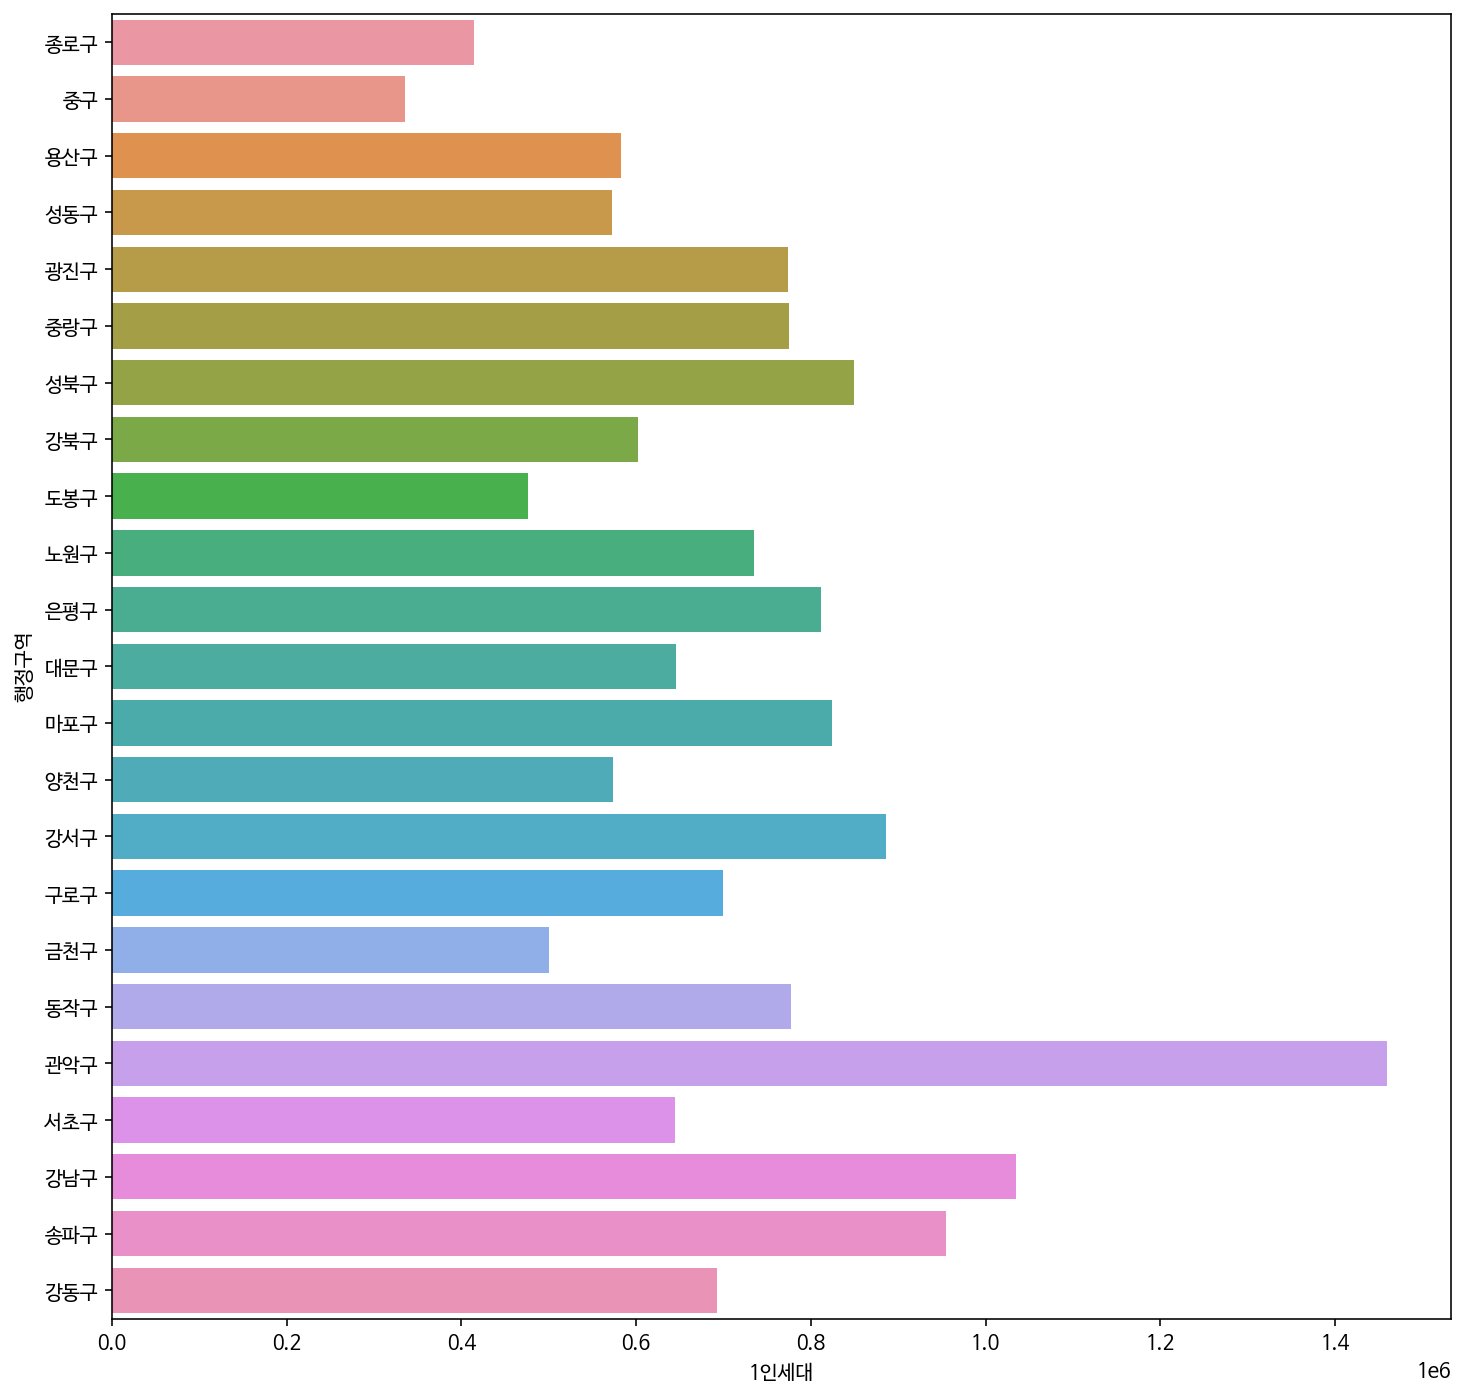

In [ ]:
figsize=plt.figure(figsize=(12,12))
sns.barplot(y='행정구역',x='1인세대', data=sample)

In [ ]:
values=sample['1인세대']
columns=sample['행정구역']
explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0,0,0,0]

Text(0.5, 1.0, '행정구역별 1인가구 비율')

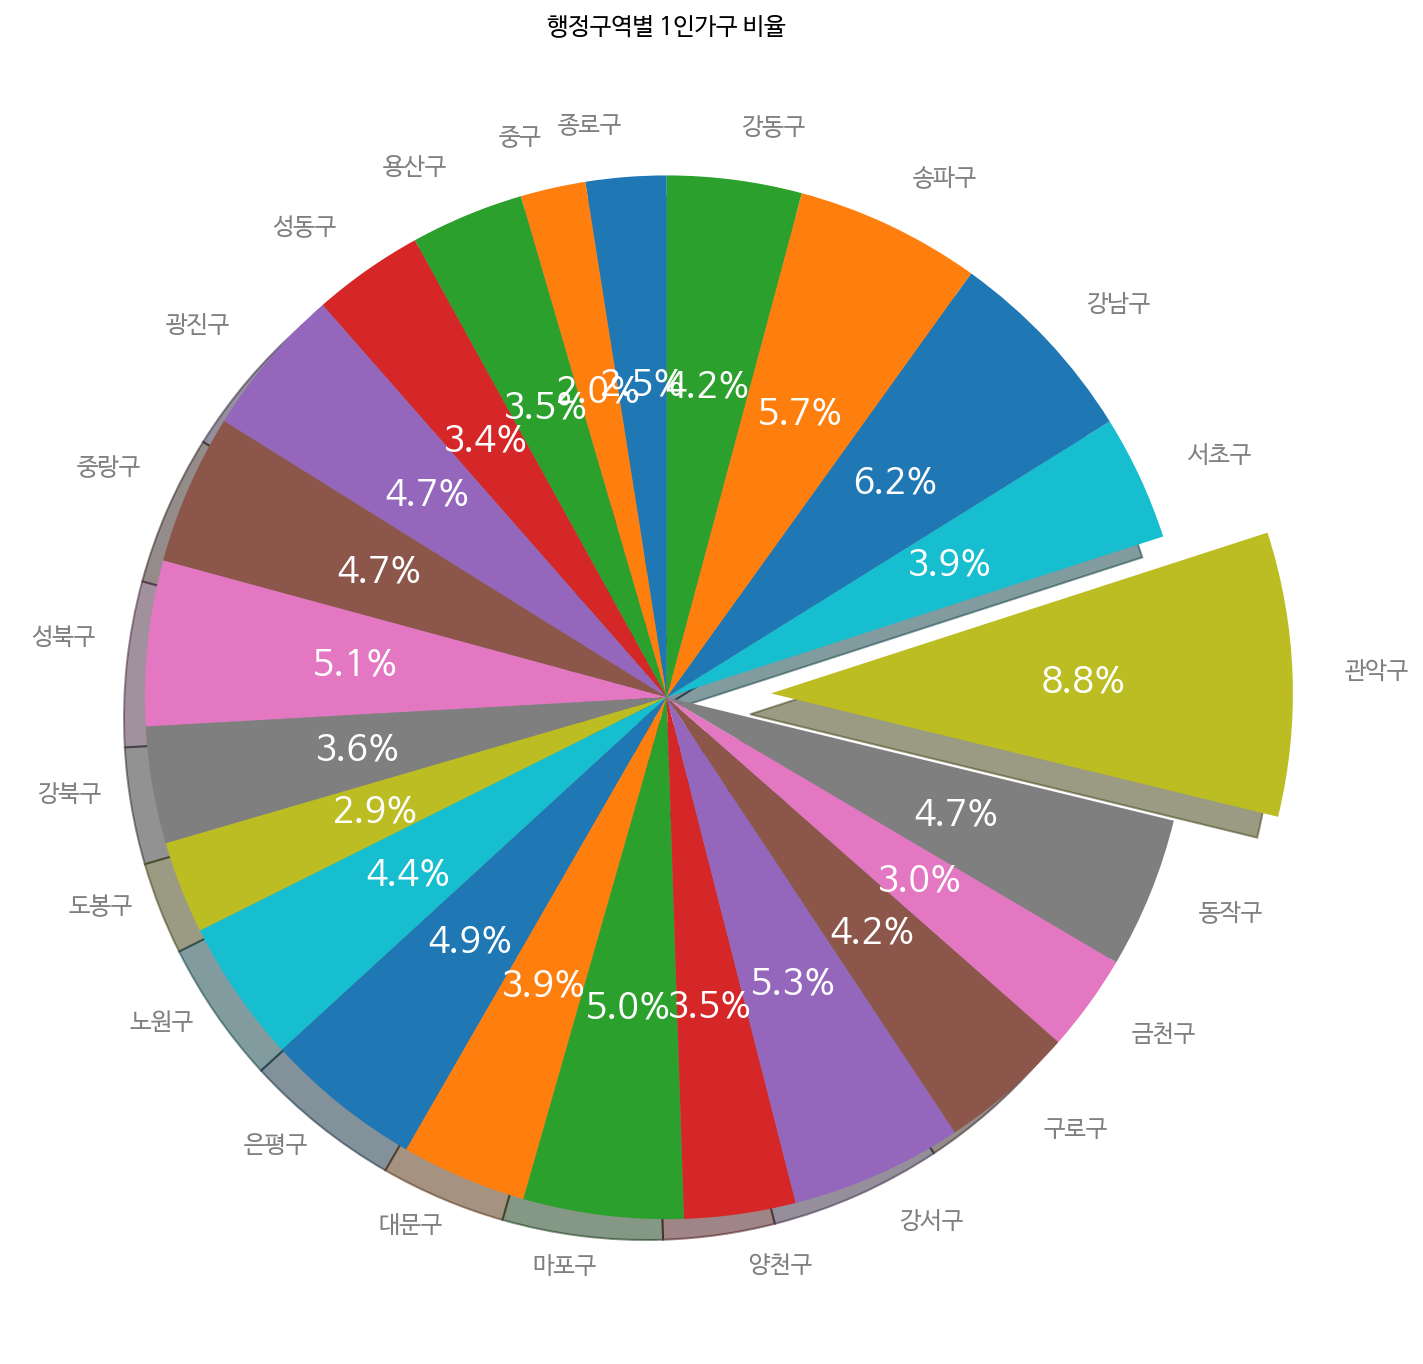

In [ ]:
figsize=plt.figure(figsize=(12,12))
patches, texts, autotexts = plt.pie(values,
                                    labels=columns,
                                    explode=explode,
                                    autopct='%1.1f%%',
                                    shadow=True,
                                    startangle=90)

for i in texts :
    i.set_fontsize(12)
    i.set_color('grey')

for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')

plt.title('행정구역별 1인가구 비율')

In [ ]:
sample_transpose = sample.transpose()

In [ ]:
sample_transpose=sample_transpose.reset_index()

In [ ]:
sample.head()

group,행정구역,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대
0,종로구,414381,158361,132603,128536,36468,8980,2225,547,188
1,중구,335188,139795,111749,100931,26656,6448,1687,385,109
2,용산구,582891,253514,212295,192987,50116,11610,2875,892,262
3,성동구,572256,302273,281546,274161,65506,15974,3840,1090,314
4,광진구,774365,359957,330287,344840,78037,17204,3821,1073,243


In [ ]:
sample_idx=sample
sample_idx.index=sample['행정구역']

In [ ]:
sample_idx=sample_idx.drop(columns='행정구역', axis=1)

In [ ]:
sample_idx=sample_idx.transpose()

In [ ]:
sample_idx=sample_idx.reset_index()
sample_idx

행정구역,group,종로구,중구,용산구,성동구,광진구,중랑구,성북구,강북구,도봉구,노원구,은평구,대문구,마포구,양천구,강서구,구로구,금천구,동작구,관악구,서초구,강남구,송파구,강동구
0,1인세대,414381,335188,582891,572256,774365,774600,849863,601968,476352,735224,811022,646135,823667,573455,886122,698950,500264,777392,1.46002e+06,644817,1.03436e+06,954996,692516
1,2인세대,158361,139795,253514,302273,359957,434239,458150,369215,344207,534144,509635,321986,399218,395098,570213,419670,244393,417358,550453,381158,502572,573636,425732
2,3인세대,132603,111749,212295,281546,330287,399196,442263,327298,353191,562214,481698,285664,342753,455827,560471,403576,219672,378081,437086,410673,503891,628980,456833
3,4인세대,128536,100931,192987,274161,344840,382604,447246,295748,362499,650231,467327,278338,337975,567319,568714,413626,214149,382388,405215,478898,590917,731034,505573
4,5인세대,36468,26656,50116,65506,78037,96686,111651,76250,87352,143200,121623,69845,82640,131060,136567,103780,53640,93164,100863,114110,135368,168155,121618
5,6인세대,8980,6448,11610,15974,17204,20208,25895,16870,19532,27004,28123,16652,18498,25891,28139,23671,12223,20988,22491,25248,28336,33706,25954
6,7인세대,2225,1687,2875,3840,3821,4392,6441,4498,4541,5806,6111,3661,4363,5597,6391,5409,2807,4877,5719,6712,6677,7058,5166
7,8인세대,547,385,892,1090,1073,1048,1387,1137,1189,1661,1410,998,1326,1573,1459,1314,671,1387,1259,1803,1958,1853,1445
8,9인세대,188,109,262,314,243,349,338,375,281,377,432,260,364,449,617,385,209,405,508,722,769,559,502


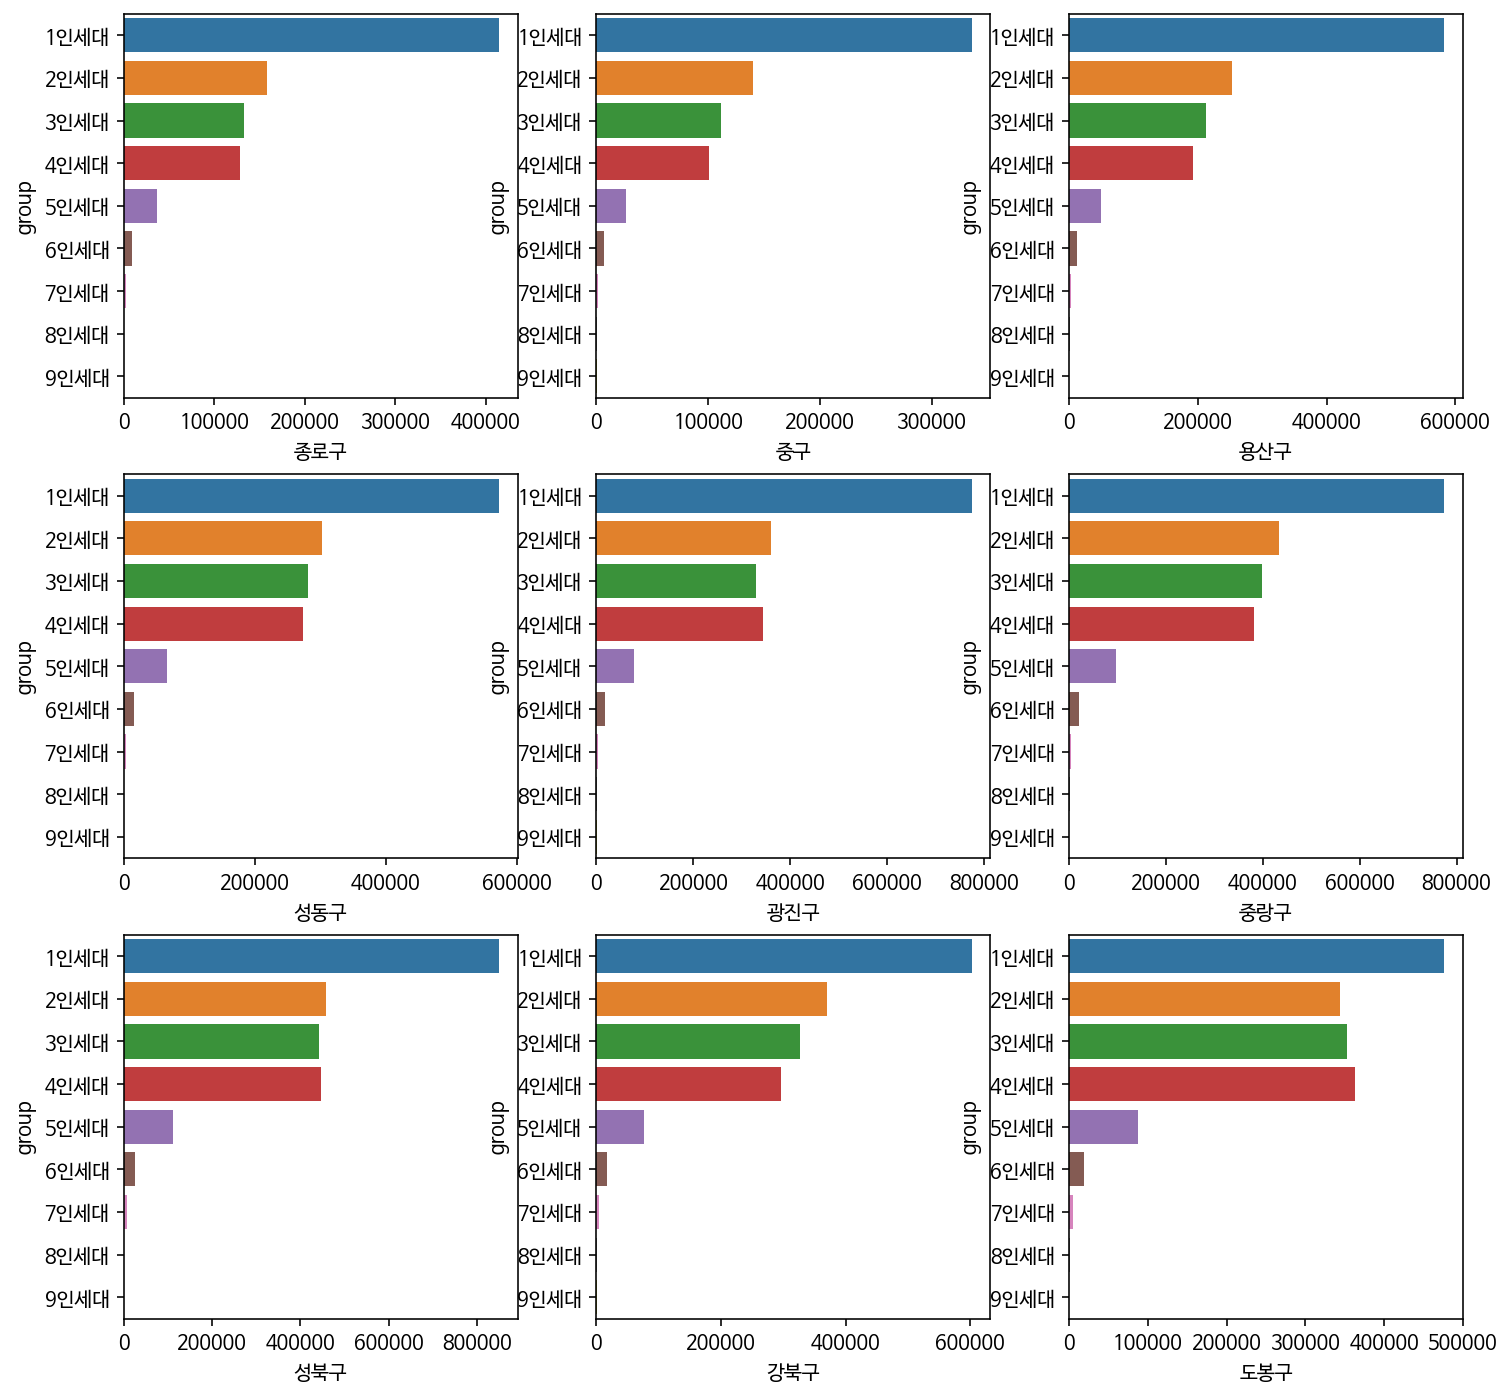

In [ ]:
figsize = plt.figure(figsize=(12,12))
plt.subplot(331)
sns.barplot(x='종로구',y='group', data=sample_idx)
plt.subplot(332)
sns.barplot(x='중구',y='group', data=sample_idx)
plt.subplot(333)
sns.barplot(x='용산구',y='group', data=sample_idx)
plt.subplot(334)
sns.barplot(x='성동구',y='group', data=sample_idx)
plt.subplot(335)
sns.barplot(x='광진구',y='group', data=sample_idx)
plt.subplot(336)
sns.barplot(x='중랑구',y='group', data=sample_idx)
plt.subplot(337)
sns.barplot(x='성북구',y='group', data=sample_idx)
plt.subplot(338)
sns.barplot(x='강북구',y='group', data=sample_idx)
plt.subplot(339)
sns.barplot(x='도봉구',y='group', data=sample_idx)


In [ ]:
sample_idx['종로구'].sum()
    

882289.0

In [ ]:
sum = []

for i in columns:
    a=sample_idx[i].sum()
    sum.append(a)

In [ ]:
sum_df = pd.DataFrame(sum)
sum_df.columns=['합계']

In [ ]:
sum_df['행정구역']=columns

In [ ]:
sum_df.head()
top10=sum_df.sort_values('합계',ascending=False).head(10)

Text(0.5, 1.0, '행정구역 별 전체 인구 수 ')

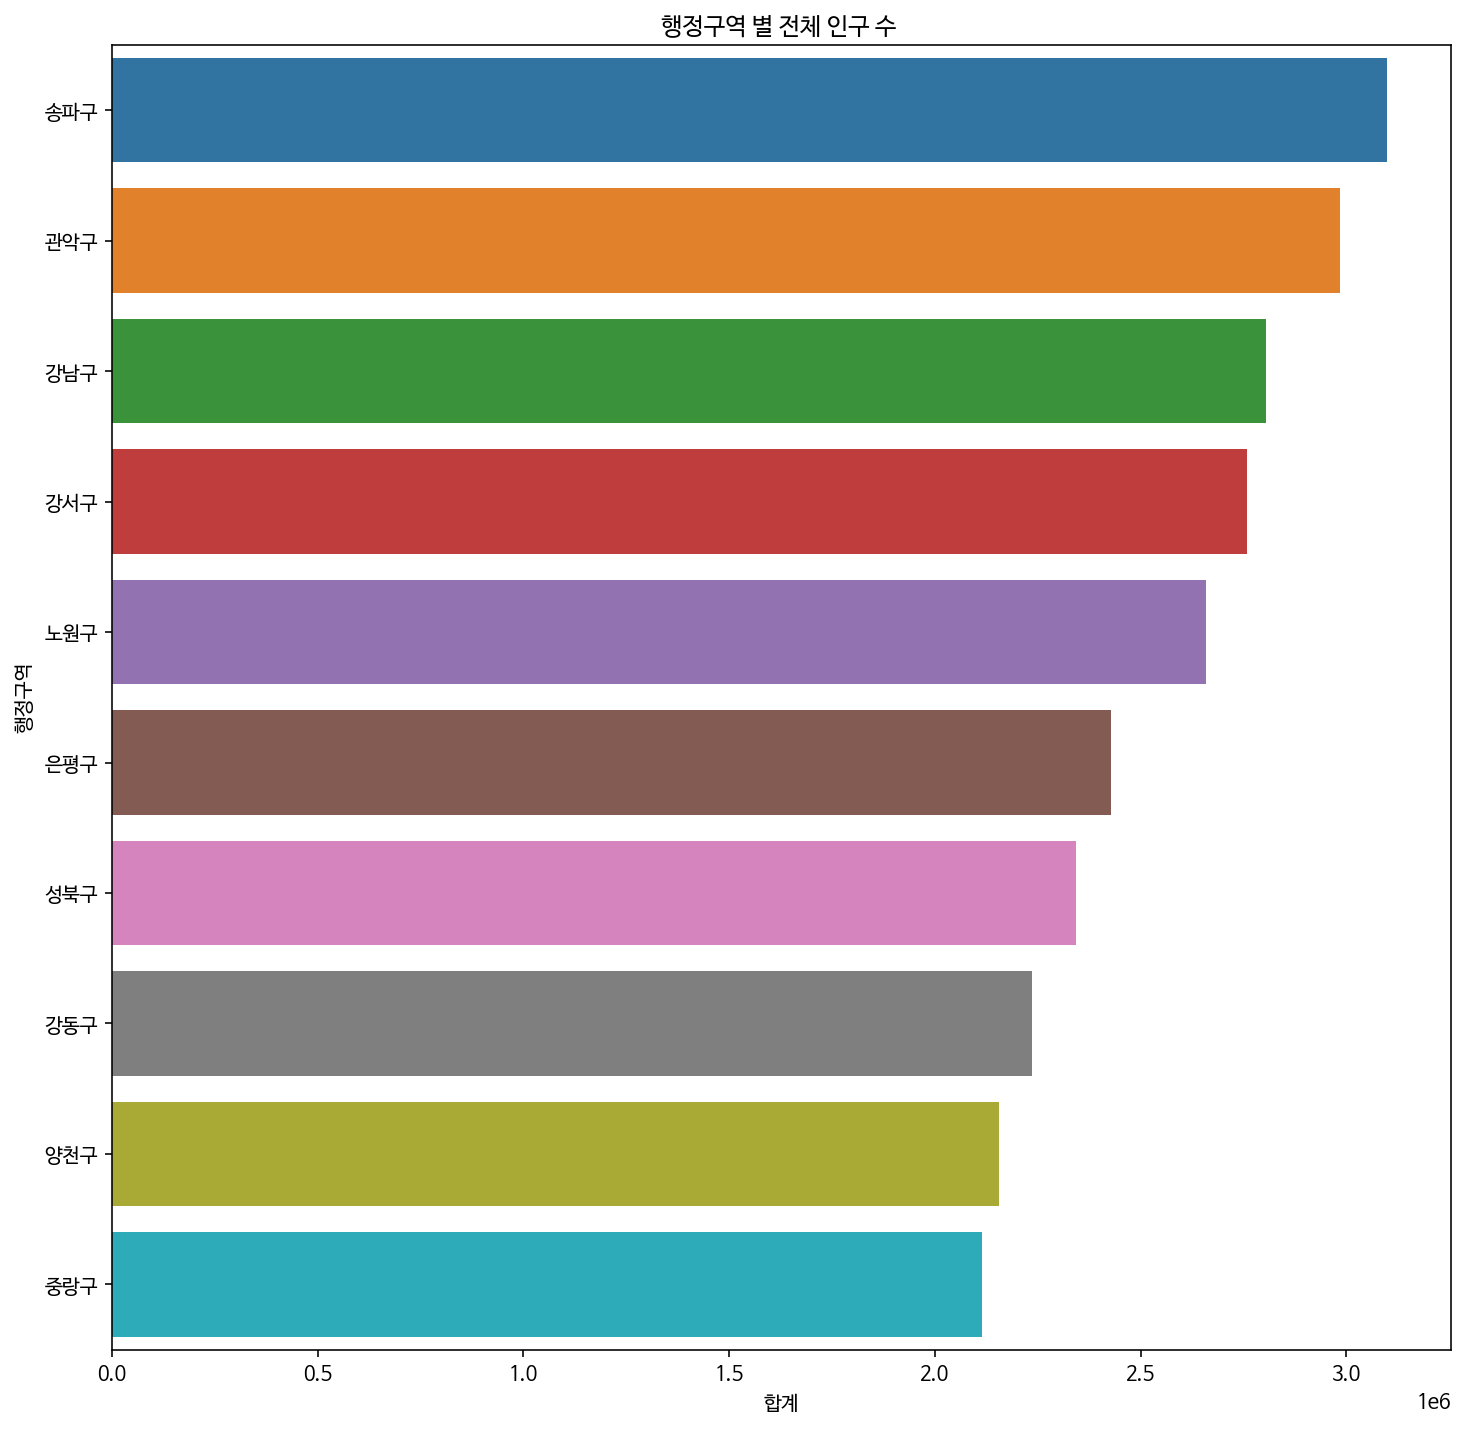

In [ ]:
figsize=plt.figure(figsize=(12,12))
sns.barplot(x='합계',y='행정구역', data=top10)
plt.title('행정구역 별 전체 인구 수')

In [ ]:
single = sample['1인세대']
single = pd.DataFrame(single)
single

,1인세대
행정구역,
종로구,414381
중구,335188
용산구,582891
성동구,572256
광진구,774365
중랑구,774600
성북구,849863
강북구,601968
도봉구,476352


In [ ]:
sum_df = pd.merge(sum_df, single, on='행정구역', how='left')

In [ ]:
sum_df['pct']=sum_df['1인세대']/sum_df['합계']*100
sum_df.head()

,합계,행정구역,1인세대,pct
0,882289.0,종로구,414381,46.9666
1,722948.0,중구,335188,46.3641
2,1307442.0,용산구,582891,44.5826
3,1516960.0,성동구,572256,37.7239
4,1909827.0,광진구,774365,40.5463


In [ ]:
single_top10 = sum_df.sort_values(by='pct', ascending=False).head(10)

In [ ]:
pd.merge(top10, single_top10, on='행정구역', how='left')

,합계,행정구역,1인세대,pct
21,3099977.0,송파구,954996,30.8066
18,2983618.0,관악구,1.46002e+06,48.9347
20,2804848.0,강남구,1.03436e+06,36.8776
14,2758693.0,강서구,886122,32.1211
9,2659861.0,노원구,735224,27.6414
10,2427381.0,은평구,811022,33.4114
6,2343234.0,성북구,849863,36.2688
22,2235339.0,강동구,692516,30.9804
13,2156269.0,양천구,573455,26.5948
5,2113322.0,중랑구,774600,36.6532


In [ ]:
list=top10['행정구역']
top10.drop('행정구역',axis=1)


,합계,1인세대,pct
행정구역,,,
송파구,3099977.0,954996,30.8066
관악구,2983618.0,1.46002e+06,48.9347
강남구,2804848.0,1.03436e+06,36.8776
강서구,2758693.0,886122,32.1211
노원구,2659861.0,735224,27.6414
은평구,2427381.0,811022,33.4114
성북구,2343234.0,849863,36.2688
강동구,2235339.0,692516,30.9804
양천구,2156269.0,573455,26.5948


In [ ]:
top10['1인세대']=top10['1인세대'].astype(int)
top10['pct']=top10['pct'].astype(int)

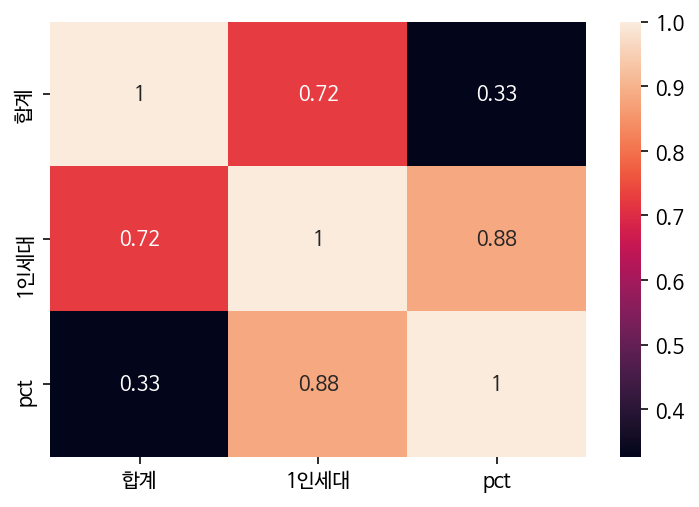

In [ ]:
sns.heatmap(top10.corr(), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


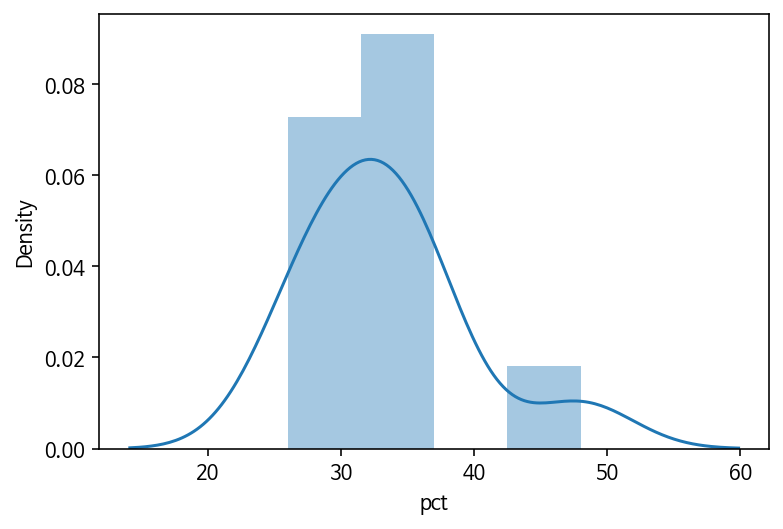

In [ ]:
sns.distplot(top10['pct'], kde=True, hist=True)